## Models of Stock Return

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [26]:
ms = pd.read_csv('../data/microsoft.csv')
ms.set_index('Date', inplace=True)
ms.head()
ms.head().to_csv('microsoft-updated.csv')

In [27]:
ms.head().shift(-1)
ms.head().shift(-1).to_csv('microsoft-shifted-updated.csv')

<AxesSubplot:xlabel='Date', ylabel='Close'>

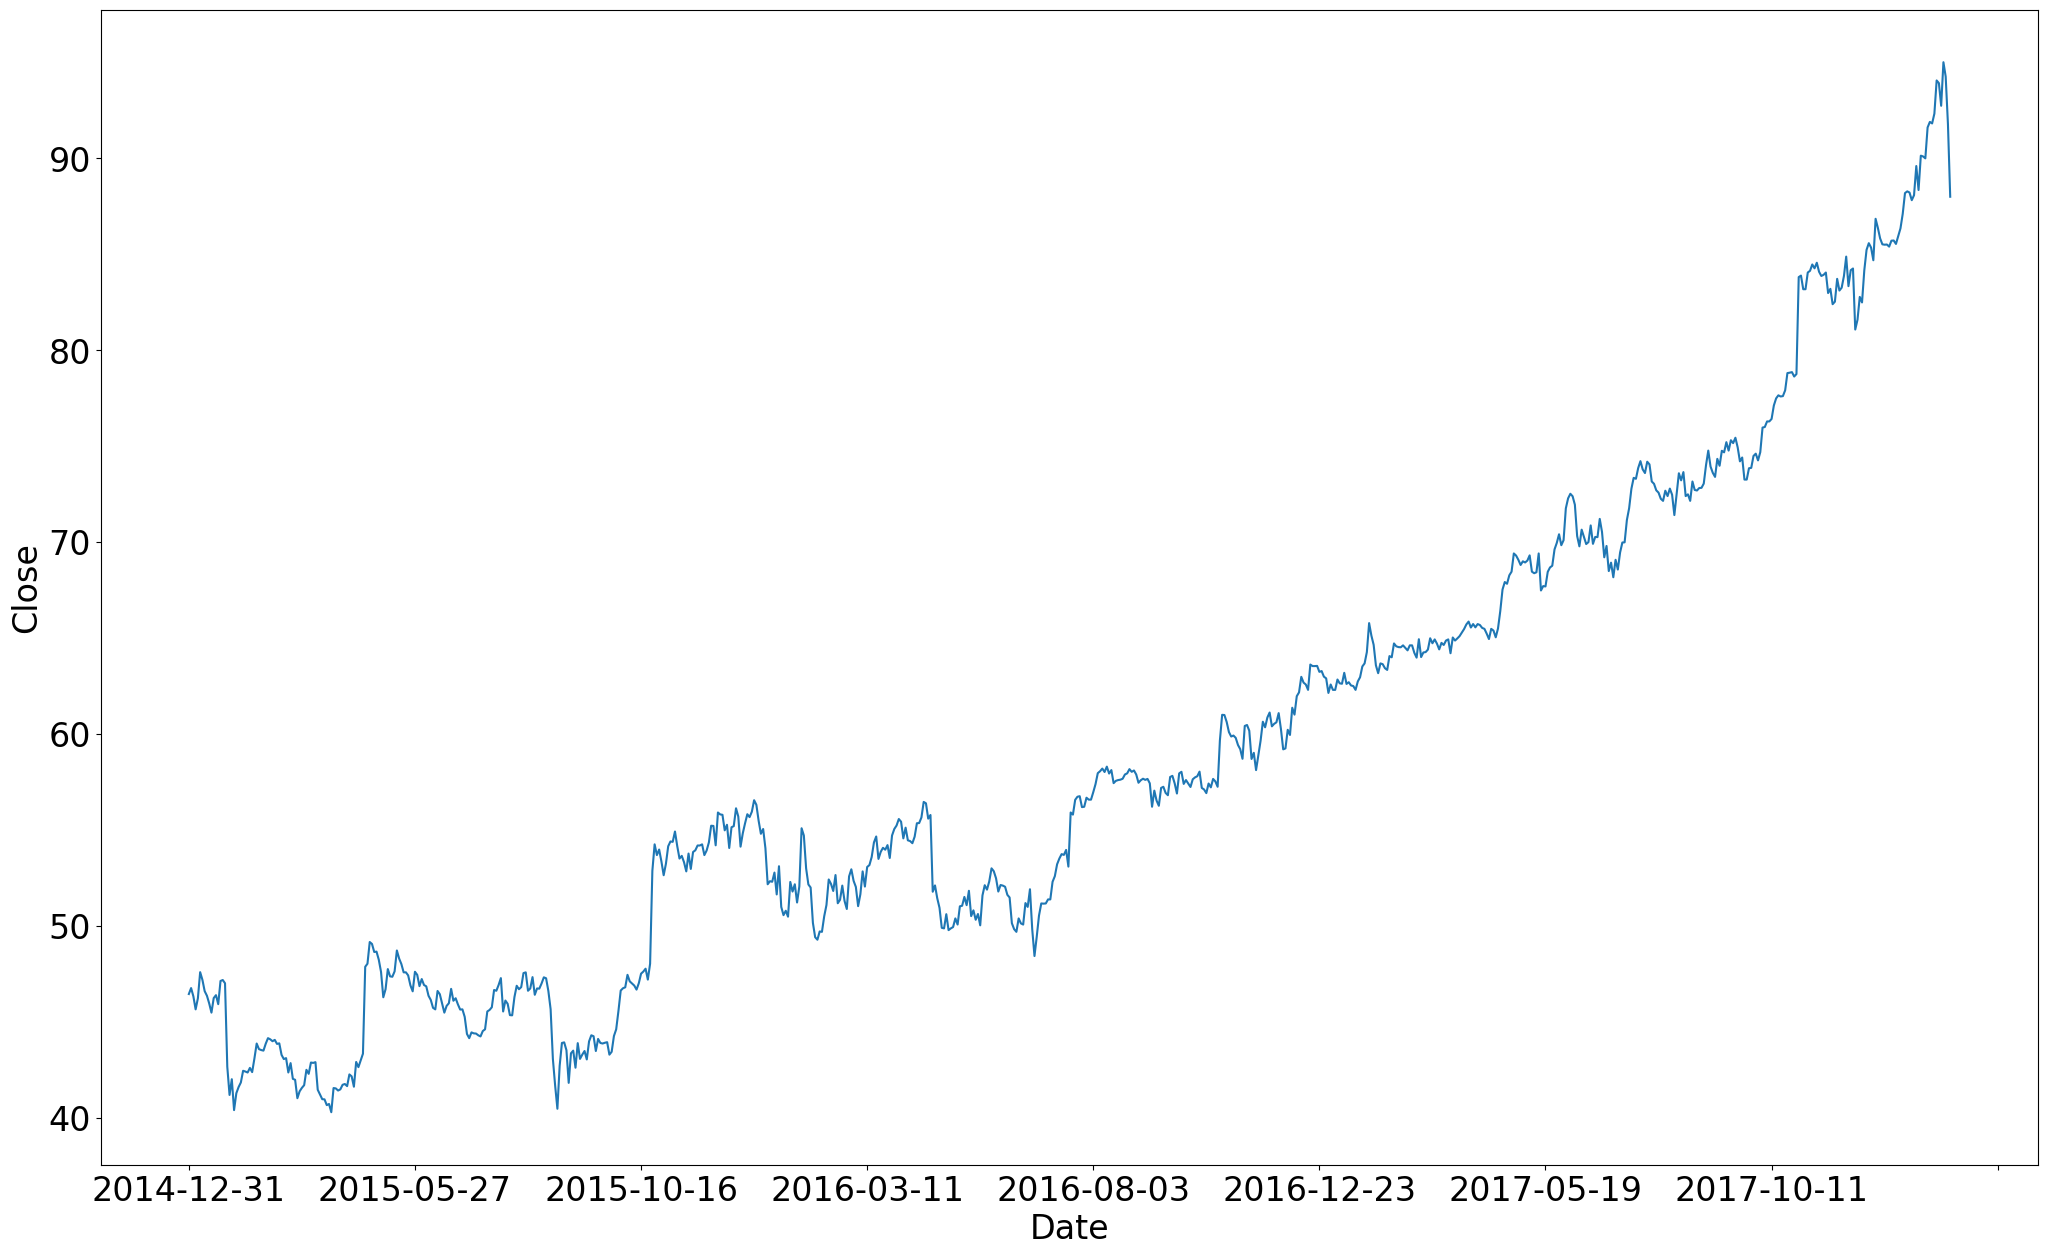

In [28]:
plt.xlabel('Date', fontsize=24)
plt.ylabel('Close', fontsize=24)
ms.loc[:, 'Close'].plot(figsize=(25, 15), use_index=True, fontsize=24)

We need to calculate the probability of the stock price dropping over 40%

to do this we compute its log daily return

## Distribution of Log return

In [29]:
# let play around with ms data by calculating the log daily return
# if the close today for example is 10
# and the close price tomorrow is is 20
# then the daily return is 20 - 10 or close price of tomorrow - today
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])
ms['LogReturn']

Date
2014-12-31    0.006652
2015-01-02   -0.009238
2015-01-05   -0.014786
2015-01-06    0.012625
2015-01-07    0.028994
                ...   
2018-01-30    0.024182
2018-01-31   -0.007925
2018-02-01   -0.026663
2018-02-02   -0.042058
2018-02-05         NaN
Name: LogReturn, Length: 780, dtype: float64

<AxesSubplot:>

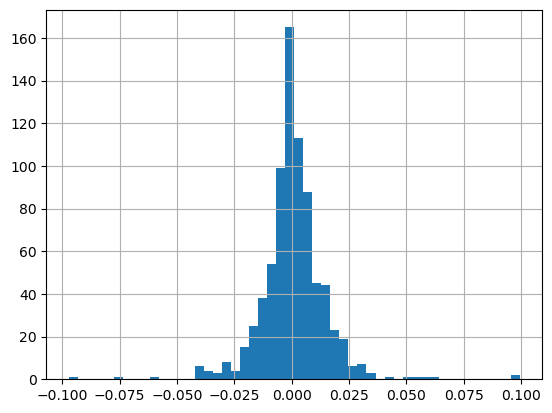

In [30]:
ms['LogReturn'].hist(bins=50)

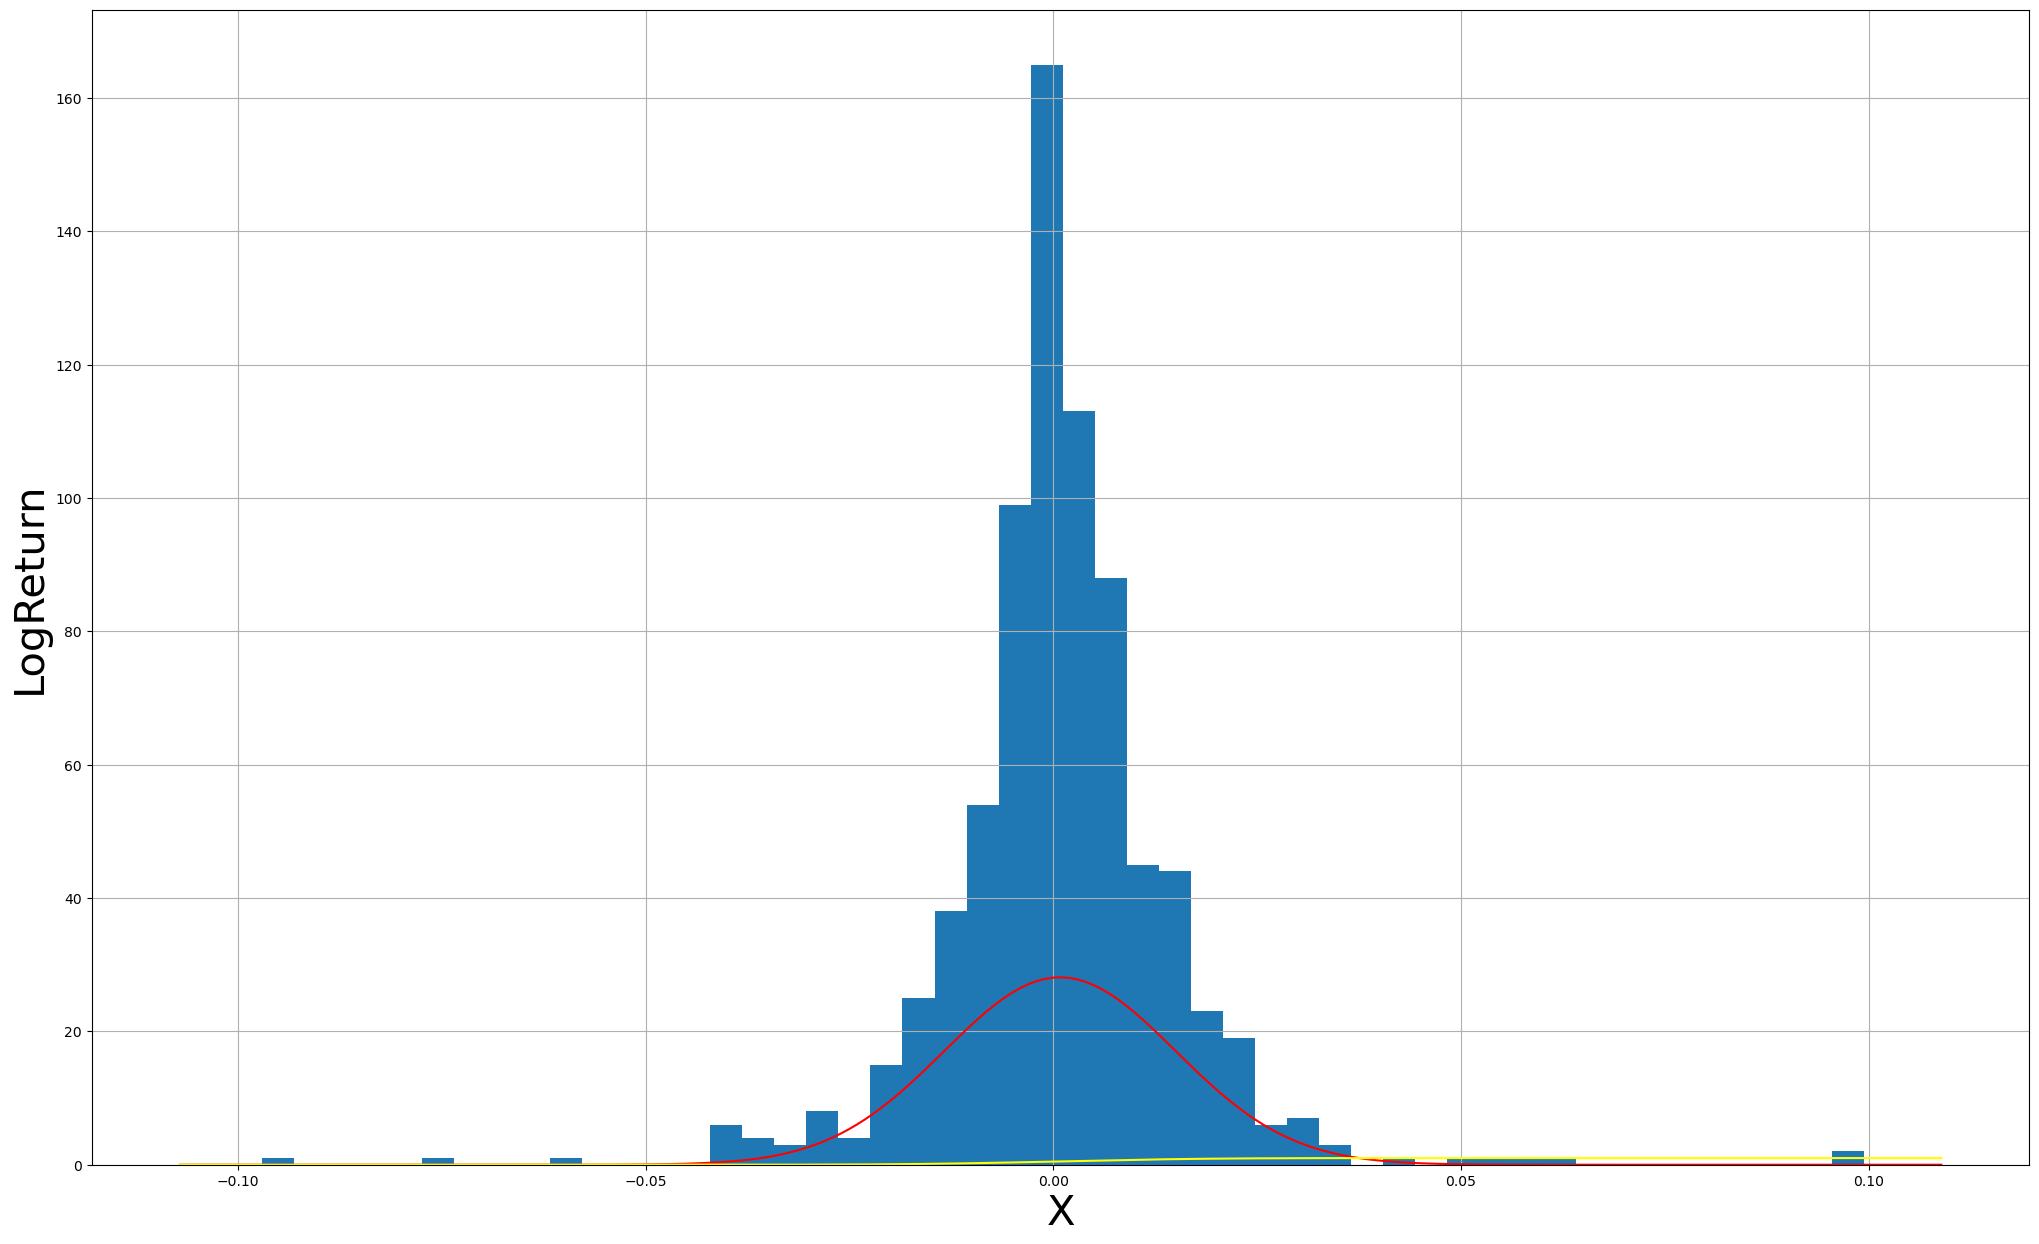

In [31]:
# Plot a histogram to show the distribution of log return of Microsoft's stock. 
# You can see it is very close to a normal distribution
from scipy.stats import norm

# when we calcualte the log return per day we calculate the mean and standard
# deviatoin of the daily log returns
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

# we know that a density is calculated through a probability density function
# X as our independent variable or input and the probability density funciton
# as our dependent variable or output
density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min() - 0.01, ms['LogReturn'].max() + 0.01, 0.001)

# norm.pdf is a method that takes in values that form the x-axis, the 2nd argument is the loc which represents the mean of these x-values
# and the scale arg representing the sigma or standard deviation of the x values which we know is the log returns
density['pdf'] = norm.pdf(density['x'], mu, sigma)
density['cdf'] = norm.cdf(density['x'], mu, sigma)


ms['LogReturn'].hist(bins=50, figsize=(25, 15))
plt.plot(density['x'], density['pdf'], color='red')

# norm.cdf akin to norm.pdf calculates the cumulative 
# distribution where it takes in an X values and outputs
# a value between 0 and 1 much like a sigmoid activation
plt.plot(density['x'], density['cdf'], color='yellow')
plt.xlabel('X',fontsize=30)
plt.ylabel('LogReturn', fontsize=30)
plt.show()

### If we had to calculate the probability of the daily return of stock that is less than -5% or -0.05:


In [32]:
# plt.ylim(0, 20)
# plt.plot(density['x'], density['pdf'])
# plt.fill_between(
#     x=np.arange(-0.1, -0.01, 0.0001), 
#     y2=0, 
#     y1=norm.pdf(np.arange(-0.1, 0.05, 0.0001), mu, sigma), 
#     facecolor='pink', 
#     alpha=0.5
# )

## Calculate the probability of the stock price will drop over a certain percentage in a day

In [33]:
# so to calculate the probability of the daily return of stock that is less than -5%
# we can use cumulative distribution function to do so given our the standard deviation
# and the mean of our daily log returns
# probability that the stock price of microsoft will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.00017118482608677817


In [34]:
# on a side note as we can see like the sigmoid activation when we input 0
# the output is as we see not exactly but almost 0.5
norm.cdf(0, mu, sigma)

0.47695565804364304

In [35]:
# Now is your turn, calculate the probability that the stock price of microsoft will drop over 10% in a day
prob_return1 = norm.cdf(-0.10, mu, sigma)
print('The Probability is ', prob_return1)

# we test this because more likely than not we will have to calculate different probabilities of stock dropping over some percent in a certain time period
# e.g. what can be the probability of a stock dropping over 40% in 1 year or 220 trading days

The Probability is  6.056775634858521e-13


**Expected Output: ** The Probability is  6.05677563486e-13

We can model the stock return using normal distribution

## Calculate the probability of the stock price will drop over a certain percentage in a year

In [36]:
# drop over 40% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.002912363313330548


In [41]:
# drop over 20% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
drop20 = norm.cdf(-0.2, mu220, sigma220)
print('The probability of dropping over 20% in 220 days is ', drop20)

The probability of dropping over 20% in 220 days is  0.03535237727490905


**Expected Output: ** The probability of dropping over 20% in 220 days is  0.0353523772749

## Calculate Value at risk (VaR)

In [38]:
# Value at risk(VaR)
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.022523362407065


In [39]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.022523362407065
95% quantile  0.024163825379311034


In [42]:
# This is your turn to calcuate the 25% and 75% Quantile of the return
# 25% quantile
q25 = norm.ppf(0.25, mu, sigma)
print('25% quantile ', q25)
# 75% quantile
q75 = norm.ppf(0.75, mu, sigma)
print('75% quantile ', q75)

25% quantile  -0.008752057838414963
75% quantile  0.010392520810661006


**Expected Output: ** 25% quantile  -0.00875205783841
75% quantile  0.0103925208107